<a href="https://colab.research.google.com/github/HarshitGupta1511/AI_ChatBot_NLP/blob/master/mini_aims_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 0.92


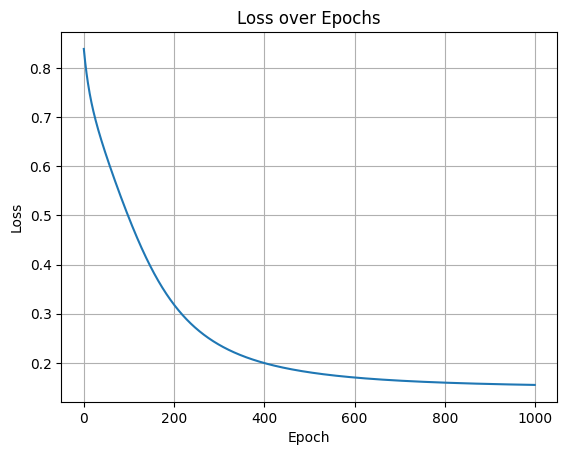

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate dummy data
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, random_state=1)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid
def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize weights
input_size, hidden_size, output_size = 2, 4, 1
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
epochs = 1000
lr = 0.1
loss_history = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss (binary cross-entropy)
    loss = -np.mean(y_train * np.log(A2 + 1e-9) + (1 - y_train) * np.log(1 - A2 + 1e-9))
    loss_history.append(loss)

    # Backpropagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0)

    # Update weights
    W2 -= lr * dW2 / len(X_train)
    b2 -= lr * db2 / len(X_train)
    W1 -= lr * dW1 / len(X_train)
    b1 -= lr * db1 / len(X_train)

# Test accuracy
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot loss over epochs
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
